# Predicting if the Wine is Good or Bad?

In this project, we are predicting if a wine is good or bad. This is a classification problem and hence I have trained the model using Logistic Regression and Random Forest Classifier. Furthermore, I have compared the accuracy score of the above mentioned algorithms trained models.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics

## Importing the dataset:

In [2]:
df=pd.read_csv("winequalityN.csv")
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Exploratory Data Analysis:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


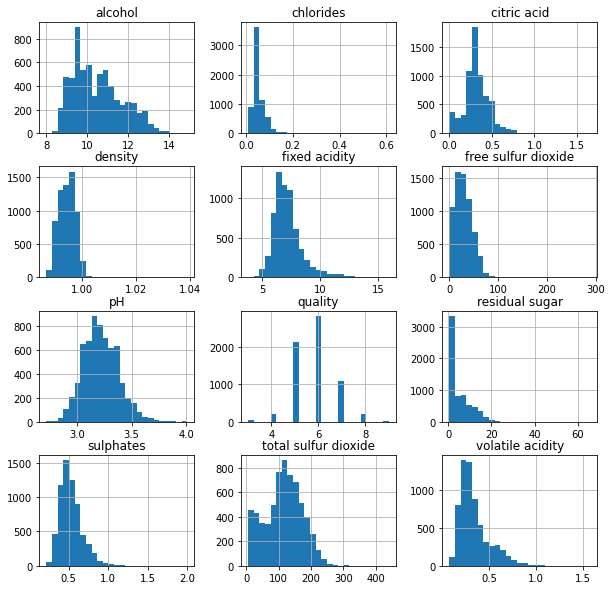

In [5]:
df.hist(bins=25, figsize=(10,10))
plt.show()

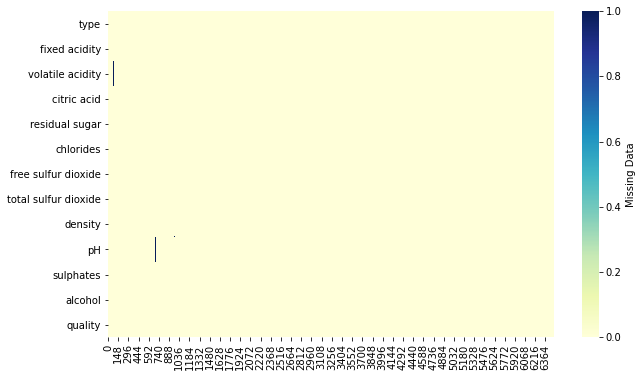

In [6]:
#Plot the graph for missing data:

plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)

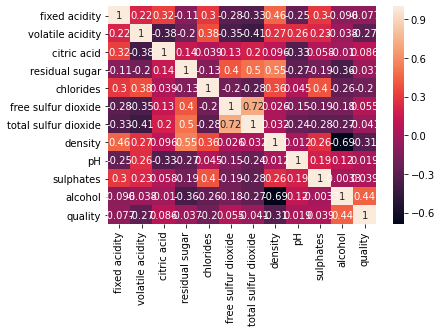

In [7]:
#Heatmap of all features:

sns.heatmap(df.corr(), annot = True)
plt.show()

## Data PreProcessing

In [8]:
#Finding the count of null values wrt to attributes/features/columns.

undefined_values=df.isnull().sum()
print(undefined_values)

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64


In [9]:
df.isnull()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,False,False,False,False,False,False,False,False,False,False,False,False,False
6493,False,False,False,False,False,False,False,False,False,False,True,False,False
6494,False,False,False,False,False,False,False,False,False,False,False,False,False
6495,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
#Filling in the null values using the mean value of the particular feature.

df.fillna(df.mean(), inplace=True)
df.head(10)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,white,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,white,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [11]:
#Converting the categorical features using get_dummies() function.

df2=pd.get_dummies(df,columns=['type'])
df2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_red,type_white
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,6,0,1
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,6,0,1
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,6,0,1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6,0,1
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,5,1,0
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,6,1,0
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,6,1,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,5,1,0


In [12]:
df2['best quality']=[1 if x>=7 else 0 for x in df.quality]
df2.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_red,type_white,best quality
0,7.000000,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0,1,0
1,6.300000,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0,1,0
2,8.100000,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0,1,0
3,7.200000,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,1,0
4,7.200000,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,1,0
5,8.100000,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0,1,0
6,6.200000,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,0,1,0
7,7.000000,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0,1,0
8,6.300000,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0,1,0
9,8.100000,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6,0,1,0


In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type_red              6497 non-null   uint8  
 13  type_white            6497 non-null   uint8  
 14  best quality          6497 non-null   int64  
dtypes: float64(11), int64

## Train-Test Split the data

In [14]:
from sklearn.model_selection import train_test_split

X=df2[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'type_red', 'type_white']]
y=df2['best quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print('Number of rows in training set: ',len(X_train))
print('Number of rows in testing set: ',len(X_test))

Number of rows in training set:  5197
Number of rows in testing set:  1300


## Logistic Regression

In [35]:
#Implementation of Logistic Regression

from sklearn.linear_model import LogisticRegression

logistic_regression= LogisticRegression(max_iter=10000)
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)
y_pred

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0, 0, 0, ..., 0, 0, 0])

In [36]:
#Concatenating the Predicted values and actual values in one dataframe.

lr_op = pd.DataFrame({'Actual value': y_test, 'Predicted value using Logistic Regression': y_pred})
lr_op

,Actual value,Predicted value using Logistic Regression
1493,1,0
2898,0,0
122,0,0
884,0,0
5098,1,0
...,...,...
617,0,0
3359,0,0
4327,0,0
2674,1,0


## Model Evaluation:

In [37]:
#Compute the Mean Square error for the Logistic Regression trained model:

meanSqErr = metrics.mean_squared_error(y_test, y_pred)
print('Mean Square Error for Logistic Regression:', meanSqErr*100,"%")

#Compute the accuracy of Logistic Regression Model:

from sklearn.metrics import accuracy_score
print("Accuracy Score of Logistic Regression: ",accuracy_score(y_test,y_pred)*100,'%')

Mean Square Error for Logistic Regression: 17.076923076923077 %
Accuracy Score of Logistic Regression:  82.92307692307692 %


In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.97      0.90      1071
           1       0.54      0.19      0.28       229

    accuracy                           0.83      1300
   macro avg       0.70      0.58      0.59      1300
weighted avg       0.79      0.83      0.79      1300



## Random Forest Classifier:

In [32]:
from sklearn.ensemble import RandomForestClassifier

rfm = RandomForestClassifier(n_estimators = 70, oob_score=True, n_jobs=1, random_state=101, max_features= None, min_samples_leaf=30)
rfm.fit(X_train, y_train)
y_pred_rfm = rfm.predict(X_test)
y_pred_rfm

array([0, 0, 0, ..., 0, 0, 0])

In [33]:
#Concatenating the Predicted values and actual values in one dataframe.

lr_op = pd.DataFrame({'Actual value': y_test, 'Predicted value using RFC': y_pred_rfm})
lr_op

,Actual value,Predicted value using RFC
1493,1,0
2898,0,0
122,0,0
884,0,0
5098,1,0
...,...,...
617,0,0
3359,0,0
4327,0,0
2674,1,0


## Model Evaluation:

In [34]:
#Compute the Mean Square error for the Logistic Regression trained model:

meanSqErr = metrics.mean_squared_error(y_test, y_pred_rfm)
print('Mean Square Error for Logistic Regression:', meanSqErr*100,"%")

# Model Accuracy, how often is the classifier correct?
print("Accuracy for Random Forest:",metrics.accuracy_score(y_test, y_pred_rfm)*100,'%')

Mean Square Error for Logistic Regression: 13.692307692307693 %
Accuracy for Random Forest: 86.3076923076923 %


In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_rfm))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1071
           1       0.71      0.37      0.49       229

    accuracy                           0.86      1300
   macro avg       0.80      0.67      0.70      1300
weighted avg       0.85      0.86      0.84      1300



## Conclusion:

We can conclusively say that upon the implementation of both the algorithms, the Random Forest Classifier is more accurate in comparison to Logistic Regression. On running the following algorithms multiple times, the result is still the same. We can see above that the accuracy score of Logistic Regression is 82% whereas for Random Forest Classifier it is 86% which justifies the above statement.